In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import seaborn as sns

# Import database

In [6]:
house = pd.read_csv('kc-house-data.csv')

In [7]:
house.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [8]:
house.tail()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
21608,263000018,20140521T000000,360000.0,3,2.50,1530,1131,3.0,0,0,...,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,6600060120,20150223T000000,400000.0,4,2.50,2310,5813,2.0,0,0,...,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,1523300141,20140623T000000,402101.0,2,0.75,1020,1350,2.0,0,0,...,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,291310100,20150116T000000,400000.0,3,2.50,1600,2388,2.0,0,0,...,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287
21612,1523300157,20141015T000000,325000.0,2,0.75,1020,1076,2.0,0,0,...,7,1020,0,2008,0,98144,47.5941,-122.299,1020,1357


In [9]:
house.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

In [10]:
house.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


# Cleaning database

In [11]:
house = house.drop('date', axis=1)

<Axes: xlabel='sqft_living', ylabel='price'>

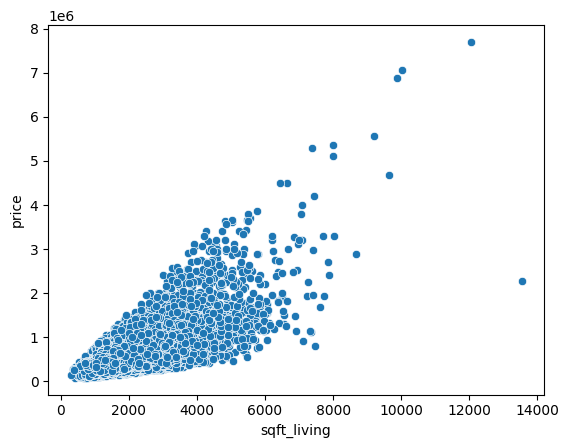

In [12]:
sns.scatterplot(x= 'sqft_living', y= 'price', data= house)

<Axes: >

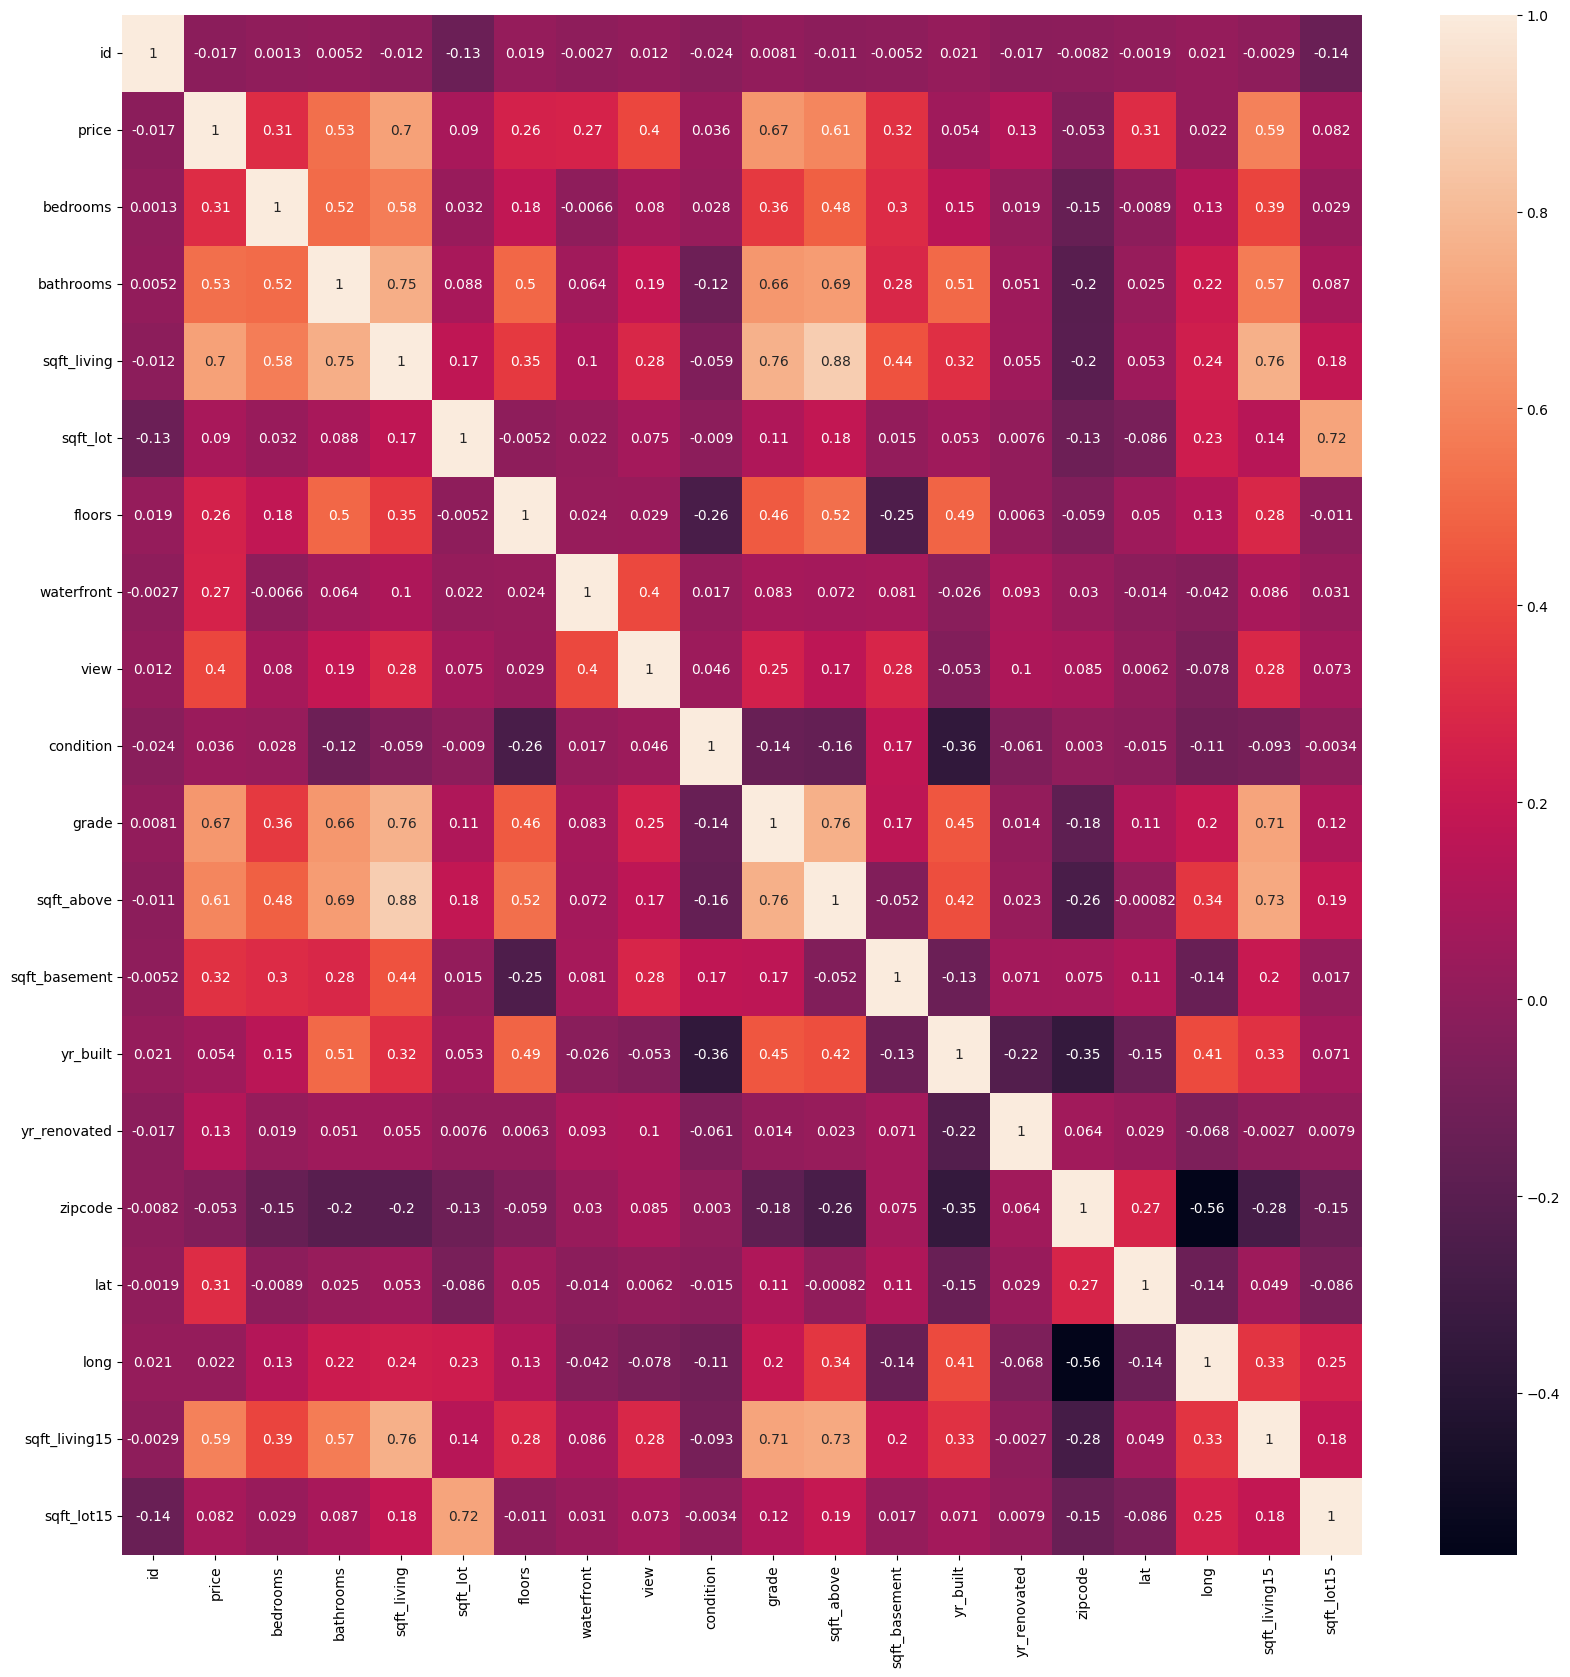

In [30]:
f, ax = plt.subplots(figsize=(20, 20))
corr = house.corr()
sns.heatmap(corr, annot= True)

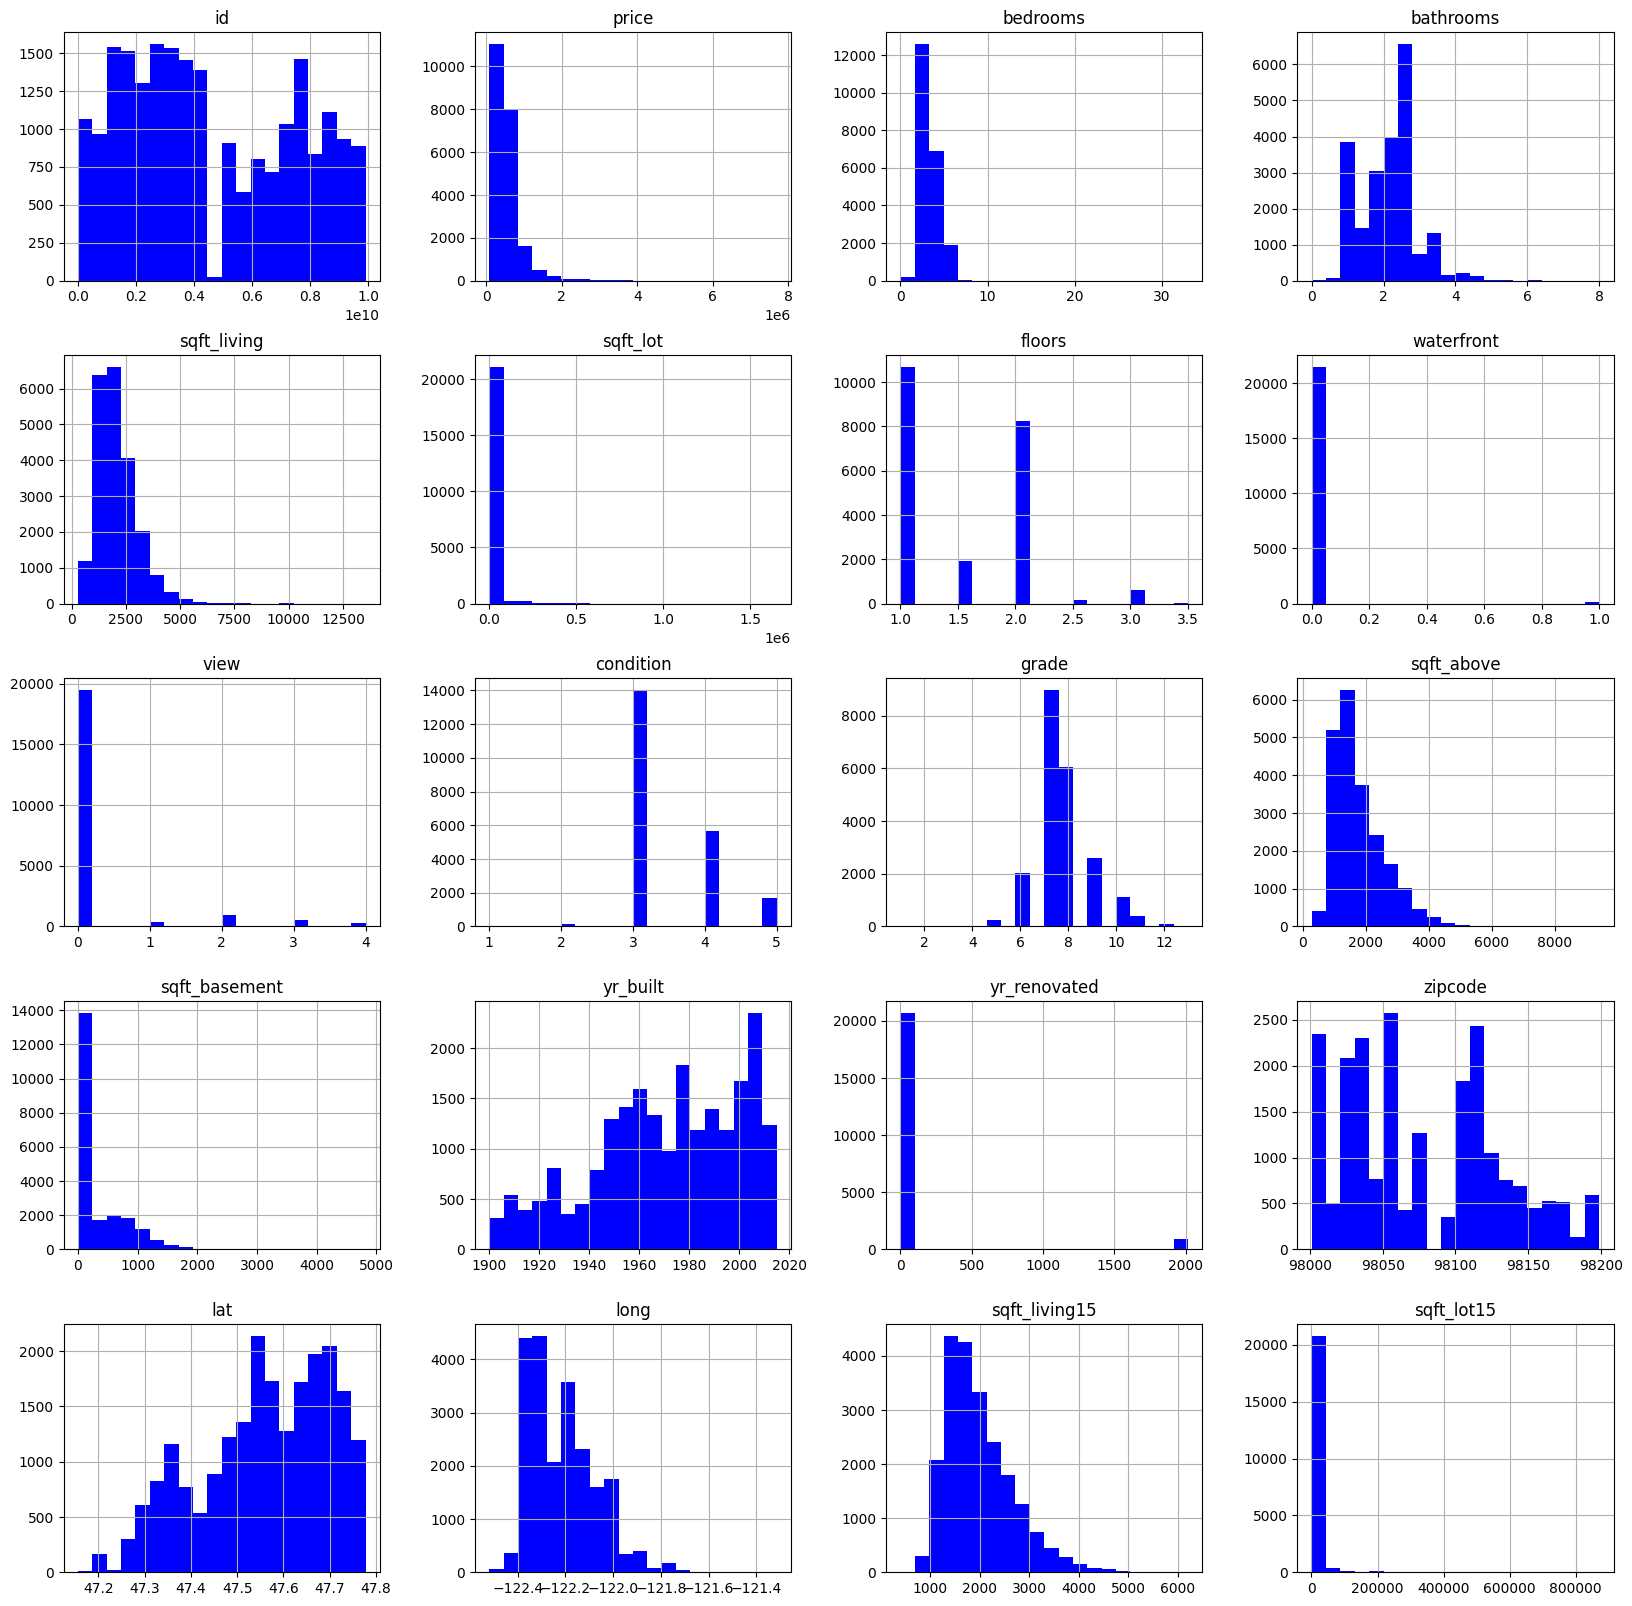

In [33]:
house.hist(bins = 20, figsize=(20,20), color = 'b');

In [32]:
sns.pairplot(house)

Output hidden; open in https://colab.research.google.com to view.

# Processing data

In [13]:
selected_features = ['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'sqft_above', 'sqft_basement']

In [14]:
x = house[selected_features]
x.head()

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,sqft_basement
0,3,1.00,1180,5650,1.0,1180,0
1,3,2.25,2570,7242,2.0,2170,400
2,2,1.00,770,10000,1.0,770,0
3,4,3.00,1960,5000,1.0,1050,910
4,3,2.00,1680,8080,1.0,1680,0


In [15]:
y = house['price']
y.head()

0    221900.0
1    538000.0
2    180000.0
3    604000.0
4    510000.0
Name: price, dtype: float64

In [16]:
x.shape

(21613, 7)

In [17]:
y.shape

(21613,)

In [18]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
x_scaled = scaler.fit_transform(x)

In [19]:
x_scaled

array([[0.09090909, 0.125     , 0.06716981, ..., 0.        , 0.09758772,
        0.        ],
       [0.09090909, 0.28125   , 0.17207547, ..., 0.4       , 0.20614035,
        0.08298755],
       [0.06060606, 0.125     , 0.03622642, ..., 0.        , 0.05263158,
        0.        ],
       ...,
       [0.06060606, 0.09375   , 0.05509434, ..., 0.4       , 0.08004386,
        0.        ],
       [0.09090909, 0.3125    , 0.09886792, ..., 0.4       , 0.14364035,
        0.        ],
       [0.06060606, 0.09375   , 0.05509434, ..., 0.4       , 0.08004386,
        0.        ]])

In [20]:
x_scaled.shape

(21613, 7)

In [21]:
scaler.data_max_

array([3.300000e+01, 8.000000e+00, 1.354000e+04, 1.651359e+06,
       3.500000e+00, 9.410000e+03, 4.820000e+03])

In [22]:
scaler.data_min_

array([  0.,   0., 290., 520.,   1., 290.,   0.])

In [23]:
y = y.values.reshape(-1, 1)

In [24]:
y.shape

(21613, 1)

In [25]:
y_scaled = scaler.fit_transform(y)

In [26]:
y_scaled

array([[0.01926557],
       [0.06072131],
       [0.01377049],
       ...,
       [0.04289849],
       [0.04262295],
       [0.03278689]])

In [27]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_scaled, y_scaled, test_size=0.25)

In [28]:
x_train.shape

(16209, 7)

In [29]:
x_test.shape

(5404, 7)

# Set and train the model

In [30]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Dense(units=100, activation='relu', input_shape=(7, )))
model.add(tf.keras.layers.Dense(units=100, activation='relu'))
model.add(tf.keras.layers.Dense(units=100, activation='relu'))
model.add(tf.keras.layers.Dense(units=1, activation='linear'))

In [31]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 100)               800       
                                                                 
 dense_1 (Dense)             (None, 100)               10100     
                                                                 
 dense_2 (Dense)             (None, 100)               10100     
                                                                 
 dense_3 (Dense)             (None, 1)                 101       
                                                                 
Total params: 21101 (82.43 KB)
Trainable params: 21101 (82.43 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [32]:
model.compile(optimizer='Adam', loss='mean_squared_error')

In [33]:
epochs_hist = model.fit(x_train, y_train, epochs=100, batch_size=50, validation_split=0.2)

Epoch 1/100
260/260 [==============================] - 3s 5ms/step - loss: 0.0012 - val_loss: 0.0013
Epoch 2/100
260/260 [==============================] - 1s 3ms/step - loss: 0.0011 - val_loss: 0.0013
Epoch 3/100
260/260 [==============================] - 1s 3ms/step - loss: 0.0010 - val_loss: 0.0012
Epoch 4/100
260/260 [==============================] - 1s 2ms/step - loss: 0.0010 - val_loss: 0.0012
Epoch 5/100
260/260 [==============================] - 1s 2ms/step - loss: 0.0010 - val_loss: 0.0014
Epoch 6/100
260/260 [==============================] - 1s 2ms/step - loss: 9.8862e-04 - val_loss: 0.0012
Epoch 7/100
260/260 [==============================] - 1s 3ms/step - loss: 9.9048e-04 - val_loss: 0.0012
Epoch 8/100
260/260 [==============================] - 1s 3ms/step - loss: 9.8920e-04 - val_loss: 0.0012
Epoch 9/100
260/260 [==============================] - 1s 4ms/step - loss: 9.7663e-04 - val_loss: 0.0012
Epoch 10/100
260/260 [==============================] - 1s 3ms/step - loss:

# Assessment model

In [34]:
epochs_hist.history.keys()

dict_keys(['loss', 'val_loss'])

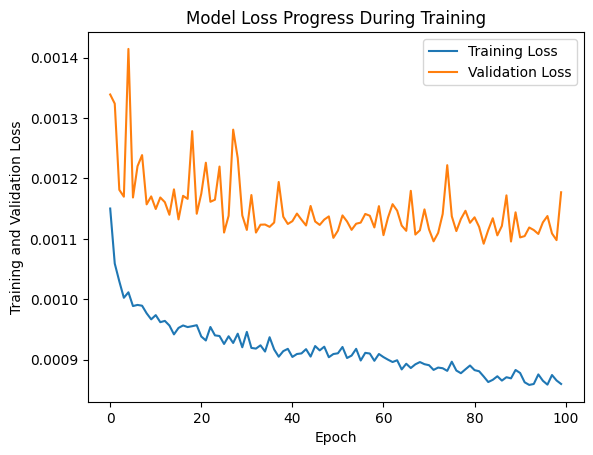

In [35]:
plt.plot(epochs_hist.history['loss'])
plt.plot(epochs_hist.history['val_loss'])
plt.title('Model Loss Progress During Training')
plt.xlabel('Epoch')
plt.ylabel('Training and Validation Loss')
plt.legend(['Training Loss', 'Validation Loss']);

In [40]:
#bedrooms, bathrooms, sqft_living, sqft_lot, floors, sqft_above, sqft_basemenet
x_test_new = np.array([[4, 3, 1960, 5000, 1, 2000, 3000]])

scaler_new = MinMaxScaler()
x_test_new_scaled = scaler_new.fit_transform(x_test_new)

y_pred = model.predict(x_test_new_scaled)
y_pred_unscaled = scaler.inverse_transform(y_pred)
print(y_pred_unscaled)

1/1 [==============================] - 0s 21ms/step
[[192371.83]]


169/169 [==============================] - 1s 4ms/step


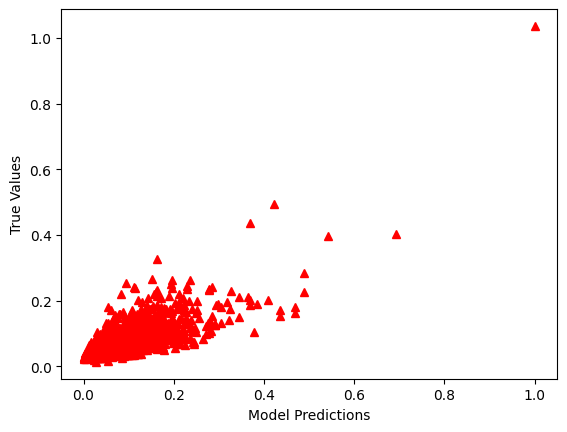

In [42]:
y_predict = model.predict(x_test)
plt.plot(y_test, y_predict, "^", color = 'r')
plt.xlabel('Model Predictions')
plt.ylabel('True Values');

In [43]:
y_predict_orig = scaler.inverse_transform(y_predict)
y_test_orig = scaler.inverse_transform(y_test)

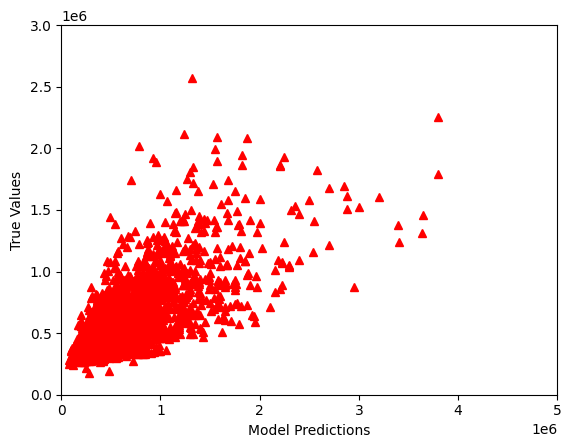

In [44]:
plt.plot(y_test_orig, y_predict_orig, "^", color = 'r')
plt.xlabel('Model Predictions')
plt.ylabel('True Values')
plt.xlim(0, 5000000)
plt.ylim(0, 3000000);

In [47]:
k = x_test.shape[1]
n = len(x_test)
n

5404

In [48]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from math import sqrt

RMSE = float(format(np.sqrt(mean_squared_error(y_test_orig, y_predict_orig)),'.3f'))
MSE = mean_squared_error(y_test_orig, y_predict_orig)
MAE = mean_absolute_error(y_test_orig, y_predict_orig)
r2 = r2_score(y_test_orig, y_predict_orig)
adj_r2 = 1-(1-r2)*(n-1)/(n-k-1)

print('RMSE =',RMSE, '\nMSE =',MSE, '\nMAE =',MAE, '\nR2 =', r2, '\nAdjusted R2 =', adj_r2)

RMSE = 233914.478 
MSE = 54715982975.438126 
MAE = 151174.1436725111 
R2 = 0.5959714291271431 
Adjusted R2 = 0.5954473001434311


# More features

In [50]:
selected_features = ['bedrooms','bathrooms','sqft_living','sqft_lot','floors', 'sqft_above', 'sqft_basement', 'waterfront', 'view', 'condition', 'grade', 'sqft_above', 'yr_built',
'yr_renovated', 'zipcode', 'lat', 'long', 'sqft_living15', 'sqft_lot15']

X = house[selected_features]

In [51]:
X.head()

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,sqft_basement,waterfront,view,condition,grade,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,3,1.00,1180,5650,1.0,1180,0,0,0,3,7,1180,1955,0,98178,47.5112,-122.257,1340,5650
1,3,2.25,2570,7242,2.0,2170,400,0,0,3,7,2170,1951,1991,98125,47.7210,-122.319,1690,7639
2,2,1.00,770,10000,1.0,770,0,0,0,3,6,770,1933,0,98028,47.7379,-122.233,2720,8062
3,4,3.00,1960,5000,1.0,1050,910,0,0,5,7,1050,1965,0,98136,47.5208,-122.393,1360,5000
4,3,2.00,1680,8080,1.0,1680,0,0,0,3,8,1680,1987,0,98074,47.6168,-122.045,1800,7503


In [52]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

In [53]:
X_scaled

array([[0.09090909, 0.125     , 0.06716981, ..., 0.21760797, 0.16193426,
        0.00574235],
       [0.09090909, 0.28125   , 0.17207547, ..., 0.16611296, 0.22216486,
        0.00802712],
       [0.06060606, 0.125     , 0.03622642, ..., 0.23754153, 0.3994149 ,
        0.00851302],
       ...,
       [0.06060606, 0.09375   , 0.05509434, ..., 0.18272425, 0.10686629,
        0.00155764],
       [0.09090909, 0.3125    , 0.09886792, ..., 0.37375415, 0.17398038,
        0.00073057],
       [0.06060606, 0.09375   , 0.05509434, ..., 0.18272425, 0.10686629,
        0.00081098]])

In [55]:
y = house['price']

In [56]:
y = y.values.reshape(-1,1)
y_scaled = scaler.fit_transform(y)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_scaled, test_size = 0.25)

In [57]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Dense(units=100, activation='relu', input_shape=(19, )))
model.add(tf.keras.layers.Dense(units=100, activation='relu'))
model.add(tf.keras.layers.Dense(units=100, activation='relu'))
model.add(tf.keras.layers.Dense(units=1, activation='linear'))

In [58]:
model.compile(optimizer='Adam', loss='mean_squared_error')

In [59]:
epochs_hist = model.fit(X_train, y_train, epochs = 100, batch_size = 50, validation_split = 0.2)

Epoch 1/100
260/260 [==============================] - 2s 3ms/step - loss: 7.3729e-04 - val_loss: 8.2285e-04
Epoch 2/100
260/260 [==============================] - 1s 3ms/step - loss: 4.9624e-04 - val_loss: 4.9642e-04
Epoch 3/100
260/260 [==============================] - 1s 4ms/step - loss: 4.2794e-04 - val_loss: 5.7363e-04
Epoch 4/100
260/260 [==============================] - 1s 4ms/step - loss: 3.9890e-04 - val_loss: 4.6053e-04
Epoch 5/100
260/260 [==============================] - 1s 3ms/step - loss: 3.7421e-04 - val_loss: 4.0071e-04
Epoch 6/100
260/260 [==============================] - 1s 2ms/step - loss: 3.6101e-04 - val_loss: 3.6346e-04
Epoch 7/100
260/260 [==============================] - 1s 3ms/step - loss: 3.4421e-04 - val_loss: 3.8071e-04
Epoch 8/100
260/260 [==============================] - 1s 4ms/step - loss: 3.0637e-04 - val_loss: 3.3967e-04
Epoch 9/100
260/260 [==============================] - 1s 3ms/step - loss: 3.1150e-04 - val_loss: 3.4853e-04
Epoch 10/100
260/26

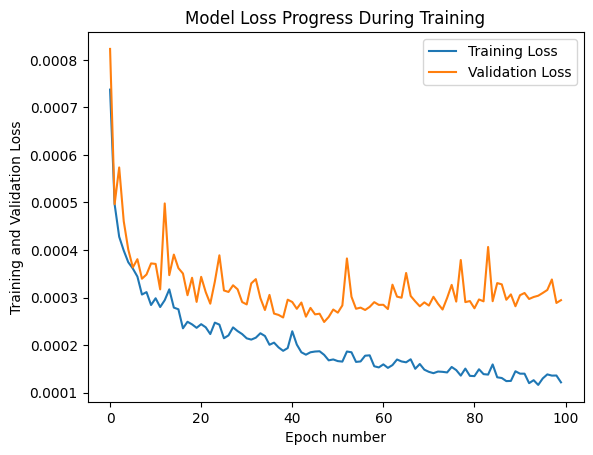

In [60]:
plt.plot(epochs_hist.history['loss'])
plt.plot(epochs_hist.history['val_loss'])
plt.title('Model Loss Progress During Training')
plt.ylabel('Training and Validation Loss')
plt.xlabel('Epoch number')
plt.legend(['Training Loss', 'Validation Loss']);

169/169 [==============================] - 0s 2ms/step


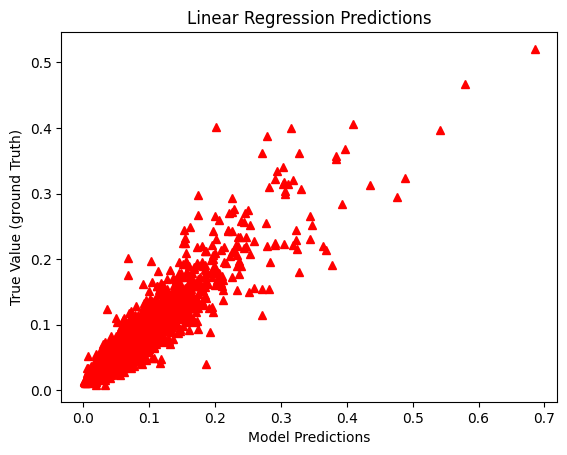

In [61]:
y_predict = model.predict(X_test)
plt.plot(y_test, y_predict, "^", color = 'r')
plt.xlabel("Model Predictions")
plt.ylabel("True Value (ground Truth)")
plt.title('Linear Regression Predictions')
plt.show()

In [62]:
y_predict_orig = scaler.inverse_transform(y_predict)
y_test_orig = scaler.inverse_transform(y_test)

In [63]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from math import sqrt

RMSE = float(format(np.sqrt(mean_squared_error(y_test_orig, y_predict_orig)),'.3f'))
MSE = mean_squared_error(y_test_orig, y_predict_orig)
MAE = mean_absolute_error(y_test_orig, y_predict_orig)
r2 = r2_score(y_test_orig, y_predict_orig)
adj_r2 = 1-(1-r2)*(n-1)/(n-k-1)

print('RMSE =',RMSE, '\nMSE =',MSE, '\nMAE =',MAE, '\nR2 =', r2, '\nAdjusted R2 =', adj_r2)

RMSE = 126588.807 
MSE = 16024726085.255745 
MAE = 70904.98512386659 
R2 = 0.8729825420262273 
Adjusted R2 = 0.8728177677108424
